<a href="https://colab.research.google.com/github/MargaritaFateeva/Terver_matstat/blob/main/DZ010_terver%26matstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 10. Дисперсионный анализ

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов:

Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.

Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.

Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

Данная промежуточная аттестация оценивается по системе "зачет" / "не зачет". "Зачет" ставится, если Слушатель успешно выполнил задание. "Незачет" ставится, если Слушатель не выполнил задание. Критерии оценивания: 1 - Слушатель провел дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

РЕШЕНИЕ:

Для данных выборок стоим график и среднее по каждой выборке.
(данные оси x искусственно создавались для визуальзации по оси y роста спортсменов по кажде+ой из 3 выборок)

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import bartlett
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [12]:
football = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hockey = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
barbell = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

n3 = np.array([4,4,4,4,4,4,4,4,4,4,4])
n2 = np.array([3,3,3,3,3,3,3,3,3])
n1 = np.array([2,2,2,2,2,2,2,2])
n4 = np.array([2,3,4])

In [13]:
k=3
n=28
y_mean1=np.mean(football)
y_mean2=np.mean(hockey)
y_mean3=np.mean(barbell)
y_mean1, y_mean2, y_mean3

(179.125, 178.66666666666666, 172.72727272727272)

In [14]:
k=3
n=28
y_mean1=np.mean(football)
y_mean2=np.mean(hockey)
y_mean3=np.mean(barbell)
y_mean = np.array([y_mean1, y_mean2, y_mean3])

<function matplotlib.pyplot.show(close=None, block=None)>

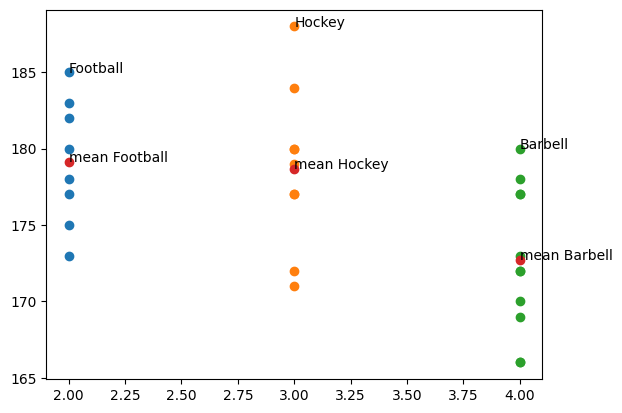

In [16]:
plt.scatter(n1, football)
plt.scatter(n2, hockey)
plt.scatter(n3, barbell)
plt.text(2,185,'Football')
plt.text(3,188,'Hockey')
plt.text(4,180,'Barbell')
plt.text(4,172.72,'mean Barbell')
plt.text(3,178.66,'mean Hockey')
plt.text(2,179.125,'mean Football')
plt.scatter(n4, y_mean)
plt.show

Проверяем гипотезу о **нормальности распределения** данных каждой выборки с помощь теста Шапиро-Уилка

Все p-value 0,94>0,77>0,5 > alpha=0.05 - **принимаем гипотезу** H0 в каждом случае **о нормальности распределения**.

Значит **можем использовать параметрические тесты** для изучения данных

In [3]:
stats.shapiro(football)

ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528)

In [4]:
stats.shapiro(hockey)

ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708)

In [5]:
stats.shapiro(barbell)

ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)

Далее делаем проверку на однородность дисперсий с помощью **Барлетт теста**

p-value=0,79 > alpha=0.05 значит мы принимаем нулевую гипотезу о том что все **дисперсии равны**

In [18]:
bartlett(football, hockey, barbell)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

**Предпосылки** использования дисперсионного анализа **выполнены**:

- независимость выборок (в условии: случайно выбранные спортсмены)

- нормальность распределения

- равенство дисперсий - выборки с разным количеством наблюдений, является важным критерием для выбора способа анализа данных

**Можем провести** **дисперсионный анализ** Текст, выделенный полужирным шрифтом для выборок роста спортсменов: football, hockey, barbell

In [19]:
len(football)==len(hockey)==len(barbell)

False

In [22]:
stats.f_oneway(football, hockey, barbell)


F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

p-value=0,0104 < alpha=0,05 - значит отвергаем H0 о том различий нет
**Различия есть**

С помощью post hoc тестов для парных сравнений проверим между какими группами есть статистически значимые различия

In [32]:
df = pd.DataFrame({'score': [173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177, 172, 171, 184, 180, 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170],
                   'group': np.repeat(["football","hockey","barbell"], repeats=[len(football),len(hockey),len(barbell)])})
df

,score,group
0,173,football
1,175,football
2,180,football
3,178,football
4,177,football
5,185,football
6,183,football
7,182,football
8,177,hockey
9,179,hockey


In [31]:
tukey=pairwise_tukeyhsd(df["score"],
 df["group"],
 alpha =0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 barbell football   6.3977 0.0219  0.8372 11.9583   True
 barbell   hockey   5.9394 0.0284  0.5607 11.3181   True
football   hockey  -0.4583  0.979 -6.2732  5.3566  False
--------------------------------------------------------


p-value (p-adj) > 0,05 только **в паре football hockey - различий нет**, принимаем гипотезу H0 о том что различий нет в среднем росте (на графике явно видно что средние значения роста футболистов и хоккеистов близки по значению)

**barbell football**   
**barbell hockey**
**Пары со штангистами есть статистически значимые различия в среднем росте** - на графике значительно отличается средний рост штангистов с футболистами и хоккеистами)